In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
from evolve import evolve, show

# Derivatives definition
def S_dot_f(state, beta, epsilon_E):
    infectious = epsilon_E * state[1] + state[2]
    outcoming = beta * state[0] * infectious
    return - outcoming 

def E_dot_f(state, beta, epsilon_E, k):
    infectious = epsilon_E * state[1] + state[2]
    incoming = beta * state[0] * infectious
    outcoming = k * state[1]
    return incoming - outcoming

def I_dot_f(state, alpha, beta, k):
    incoming = k * state[1]
    outcoming = alpha * state[2]
    return incoming - outcoming

def R_dot_f(state, alpha, f):
    incoming = f * alpha * state[2]
    return incoming

def N_dot_f(state, alpha, f):
    outcoming = alpha * (1 - f) * state[2]
    return - outcoming

def deriv(state, t, alpha, beta, epsilon_E, k, f):
    S_dot = S_dot_f(state, beta, epsilon_E)
    E_dot = E_dot_f(state, beta, epsilon_E, k)
    I_dot = I_dot_f(state, alpha, beta, k)
    R_dot = R_dot_f(state, alpha, f)
    N_dot = N_dot_f(state, alpha, f)
    return np.asarray([S_dot, E_dot, I_dot, R_dot, N_dot])

In [4]:
# Parameters
alpha = 0.001 # rate of people leaving the infected (dead or recovered)
beta = 0.004 # rate of people leaving the susceptibles per infected
epsilon_E = 0.8 # rate of exposed people who are infectious
k = 0.1 # rate of people leaving the exposed
f = 0.5 # rate of people stopping being infected who survive
deriv_params = (alpha, beta, epsilon_E, k, f) # same order as in the deriv function's arguments

# Initial conditions
N0 = 100
S0 = 95
E0 = 0
I0 = 5
R0 = 0
state0 = np.asarray([S0, E0, I0, R0, N0])

timelength = 10000
legend = ['susceptibles', 'exposed', 'infected', 'removed', 'total pop']

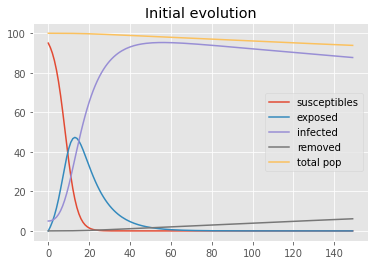

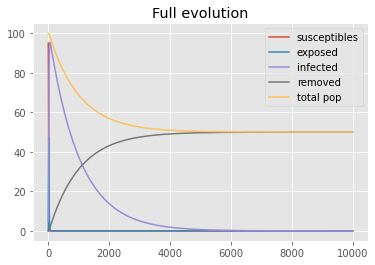

In [5]:
# evolve
history = evolve(deriv, state0, timelength, deriv_params)

# visualize
show(history, legend=legend, title='Initial evolution', last_t=150)
show(history, legend=legend, title='Full evolution')